In [19]:
from clit_recommender.util import flat_map, iterate_dirs
from clit_recommender import MD_ONLY


files = list(
    flat_map(
        lambda x: iterate_dirs(x, False), flat_map(iterate_dirs, iterate_dirs(MD_ONLY))
    )
)
x: str
names = set(map(lambda x: "/".join(x.split("/")[-2:]), files))


print(len(files))
print(len(names))
print(files[0])

19464
19464
/Users/niladi/workspace/seminar-kdd/data/2024-05-14/MDOnly/KORE_50_DBpedia.ttl/TextRazor/a7542e21d3d55116ca5c88cc0660f6347e54a74a244856ad7951ee5f5b15e984.json


In [5]:
from clit_recommender.config import Config
from clit_recommender.data.dataset import ClitResultDataset

recommender = ClitResultDataset(Config(batch_size=100))
texts = []
for i in recommender:
    for j in i:
        texts.append(j.context_text)

        # Calculate the text lengths

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


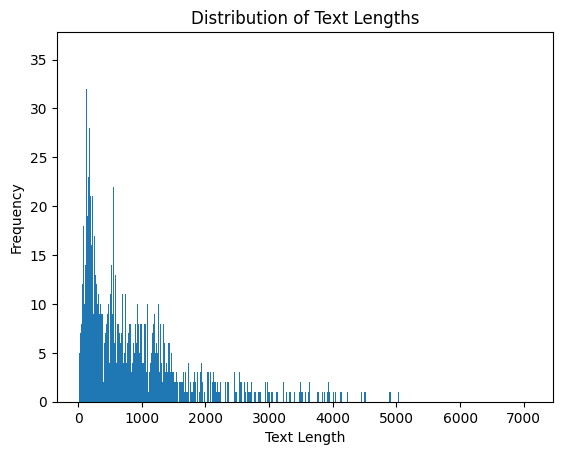

In [4]:
import matplotlib.pyplot as plt

text_lengths = [len(text) for text in texts]

# Create a histogram
plt.hist(text_lengths, bins=1000)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Lengths")
plt.show()

/Users/niladi/opt/anaconda3/envs/kdd-seminar/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
Token indices sequence length is longer than the specified maximum sequence length for this model (559 > 512). Running this sequence through the model will result in indexing errors


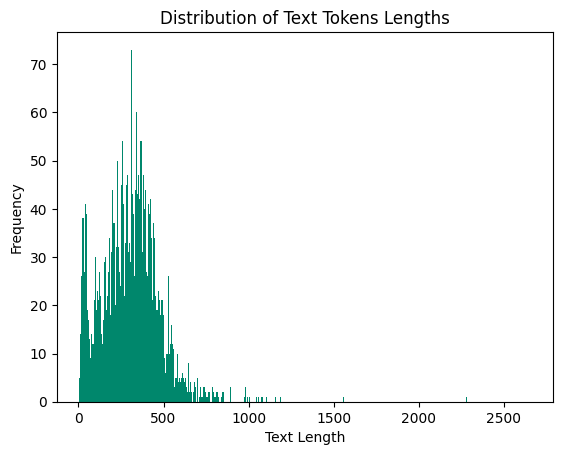

overflown: 554 / 6563


In [7]:
from transformers import AutoTokenizer
import matplotlib.pyplot as plt
from clit_recommender.config import Config


config = Config()
tokenizer = AutoTokenizer.from_pretrained(config.lm_model_name)

token_lengths = [len(tokenizer.tokenize(text)) for text in texts]

# Create a histogram
plt.hist(token_lengths, bins=1000)
plt.xlabel("Text Length")
plt.ylabel("Frequency")
plt.title("Distribution of Text Tokens Lengths")
plt.show()

token_overflows = list(
    filter(lambda tl: tl > tokenizer.model_max_length, token_lengths)
)
print("overflown:", len(token_overflows), "/", len(token_lengths))

In [4]:
test

['Foreign',
 'Ġplanes',
 'Ġto',
 'Ġland',
 'Ġin',
 'ĠChina',
 "Ġ'",
 's',
 'Ġpopular',
 'ĠGu',
 'il',
 'in',
 'Ġ.',
 'Ġ',
 'ĠBE',
 'IJ',
 'ING',
 'Ġ1996',
 '-',
 '12',
 '-',
 '06',
 'Ġ',
 'ĠChina',
 "Ġ'",
 's',
 'Ġtourist',
 'Ġspot',
 'Ġof',
 'ĠGu',
 'il',
 'in',
 'Ġin',
 'Ġthe',
 'Ġsouthern',
 'Ġregion',
 'Ġof',
 'ĠGuang',
 'xi',
 'Ġwill',
 'Ġopen',
 'Ġits',
 'Ġairport',
 'Ġto',
 'Ġforeign',
 'Ġaircraft',
 'Ġ,',
 'Ġthe',
 'ĠXin',
 'hua',
 'Ġnews',
 'Ġagency',
 'Ġsaid',
 'Ġon',
 'ĠFriday',
 'Ġ.',
 'Ġ',
 'ĠAn',
 'Ġassessment',
 'Ġgroup',
 'Ġmade',
 'Ġup',
 'Ġof',
 'Ġthe',
 'ĠState',
 'ĠCouncil',
 "Ġ'",
 's',
 'ĠPort',
 'ĠOffice',
 'Ġ,',
 'Ġthe',
 'ĠCivil',
 'ĠAviation',
 'ĠAdministration',
 'Ġof',
 'ĠChina',
 'Ġ,',
 'Ġthe',
 'ĠGeneral',
 'ĠAdministration',
 'Ġof',
 'ĠCustoms',
 'Ġand',
 'Ġother',
 'Ġauthorities',
 'Ġhad',
 'Ġgranted',
 'Ġthe',
 'Ġairport',
 'Ġpermission',
 'Ġto',
 'Ġhandle',
 'Ġforeign',
 'Ġaircraft',
 'Ġ,',
 'ĠXin',
 'hua',
 'Ġsaid',
 'Ġ.',
 'Ġ',
 'Ġ"',
 'ĠThe',
 'Ġmov

## Best Graphs Evaluation

In [1]:
import sys

print(sys.path)

['/local/users/uduui/.localpython/lib/python39.zip', '/local/users/uduui/.localpython/lib/python3.9', '/local/users/uduui/.localpython/lib/python3.9/lib-dynload', '', '/local/users/uduui/.localpython/venv/clit_recommender/lib/python3.9/site-packages', '/local/users/uduui/clit_recommender/src']


In [1]:
from data.best_graphs import generate_tensors

tensors = generate_tensors(30)

KeyboardInterrupt: 

In [5]:
from config import BEST_GRAPHS_LMDB_FILE
from config import BEST_GRAPHS_JSON_FILE
from data.lmdb_wrapper import LmdbImmutableDict
from clit_recommender import BEST_GRAPHS_PATH
from clit_recommender.config import Config
from os.path import join

lmdb = LmdbImmutableDict(join(BEST_GRAPHS_PATH, BEST_GRAPHS_LMDB_FILE))
lmdb.get("https://aifb.kit.edu/conll/18#char=0,882")

[[[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 1.0, 0.0]],
 [[0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 1.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 0.0],
  [0.0, 0.0, 1.0]]]

{3.0: 740, 1.0: 1872, 2.0: 2998, 4.0: 473, 5.0: 64, 6.0: 75}


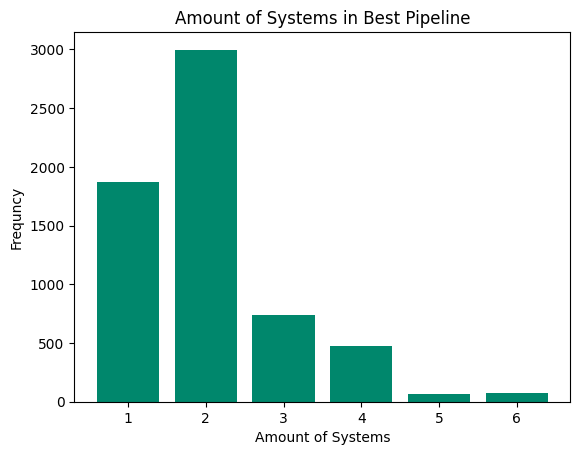

In [6]:
from config import BEST_GRAPHS_LMDB_FILE
from config import BEST_GRAPHS_JSON_FILE
from data.lmdb_wrapper import LmdbImmutableDict
from clit_recommender.config import Config
from data.dataset import ClitRecommenderDataset
from os.path import join
from tqdm.auto import tqdm
import json
from collections import Counter


# Load the best graphs JSON
with open(join(BEST_GRAPHS_JSON_FILE, BEST_GRAPHS_JSON_FILE), "r") as f:
    best_graphs = json.load(f)

graphs = []

for key, value in best_graphs.items():
    if value is None:
        print("NONE ")
        continue
    for v in value:
        graphs.append(tuple(map(tuple, v)))

element_counts = Counter(graphs)
amount = {}
for key, value in element_counts.items():
    _a = sum(map(sum, key))
    # print(value, _a, key)

    _val = value
    if _a == 1.0:
        _val /= 3  # on single majority, intersection and uninon are the same
    elif _a == 2.0 and sum([k[1] for k in key]) == 2.0:
        _val /= 2  # on 2 majority and intersection are the same
    if _a not in amount:
        amount[_a] = value
    else:
        amount[_a] += value

len(element_counts)

print(amount)

import matplotlib.pyplot as plt

# Plotting the amount dictionary as a bar chart
plt.bar(amount.keys(), amount.values())
plt.xlabel("Amount of Systems")
plt.ylabel("Frequncy")
plt.title("Amount of Systems in Best Pipeline")
plt.show()

{1: {'Single': 3621}, 2: {'Intersection or Majority Voting': 2945, 'Union': 3416}, 3: {'Union': 2261}, 4: {'Union': 873}, 5: {'Union': 84}, 6: {'Union': 108}, 7: {'Union': 1}}


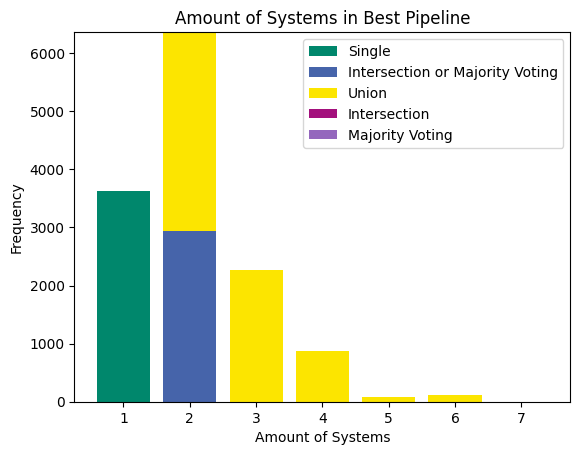

In [3]:
from config import BEST_GRAPHS_LMDB_FILE
from config import BEST_GRAPHS_JSON_FILE
from data.lmdb_wrapper import LmdbImmutableDict
from clit_recommender.config import Config

from os.path import join
from tqdm.auto import tqdm
import json
from collections import Counter


# Load the best graphs JSON
with open(join(BEST_GRAPHS_PATH, BEST_GRAPHS_JSON_FILE), "r") as f:
    best_graphs = json.load(f)

graphs = []

for key, value in best_graphs.items():
    if value is None:
        print("NONE ")
        continue
    for v in value:
        graphs.append(tuple(map(tuple, v)))

element_counts = Counter(graphs)
amount = {i + 1: {} for i in range(7)}


for key, value in element_counts.items():
    _a = sum(map(sum, key))
    # print(value, _a, key)

    _val = value

    if _a == 1.0:
        _val /= 3  # on single majority, intersection and uninon are the same
        _key = "Single"
    elif _a == 2.0 and sum([k[1] for k in key]) == 2.0:
        _val /= 2  # on 2 majority and intersection are the same
        _key = "Intersection or Majority Voting"
    elif sum([k[0] for k in key]) >= 0:
        _key = "Union"
    elif sum([k[1] for k in key]) >= 0:
        _key = "Intersection"
    elif sum([k[2] for k in key]) >= 0:
        _key = "Majority Voting"

    if _key not in amount[_a]:
        amount[_a][_key] = value
    else:
        amount[_a][_key] += value

len(element_counts)

print(amount)

import matplotlib.pyplot as plt

# Extract the keys and values from the 'amount' dictionary
keys = list(amount.keys())
values = list(amount.values())

# Create a list of labels for the x-axis
labels = [
    "Single",
    "Intersection or Majority Voting",
    "Union",
    "Intersection",
    "Majority Voting",
]

# Create a list of colors for the stacked bars
colors = [
    "#00876C",
    "#4664aa",
    "#fce500",
    "#a3107c",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

# Create a list of bottom values for the stacked bars
bottom = [0] * len(keys)

# Plot the stacked bars
for i in range(len(labels)):
    plt.bar(
        keys,
        [v.get(labels[i], 0) for v in values],
        bottom=bottom,
        label=labels[i],
        color=colors[i],
    )
    bottom = [
        bottom[j] + [v.get(labels[i], 0) for v in values][j] for j in range(len(keys))
    ]

# Add labels and title to the plot
plt.xlabel("Amount of Systems")
plt.ylabel("Frequency")
plt.title("Amount of Systems in Best Pipeline")

# Add legend to the plot
plt.legend()

# Show the plot
plt.show()

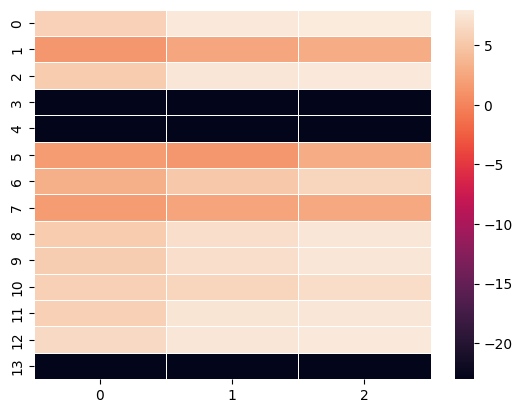

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


matrizes = map(np.matrix, graphs)

s_matrizes = sum(matrizes, np.zeros((14, 3)))
ln_s_matrizes = np.log(np.where(s_matrizes == 0, 1e-10, s_matrizes))


ax = sns.heatmap(ln_s_matrizes, linewidth=0.5)
plt.show()

In [5]:
import os
from clit_recommender.util import iterate_dirs, flat_map

from collections import Counter

path = "/Users/niladi/workspace/seminar-kdd/data/2024-05-14/MDOnly"
systems = []

for i in flat_map(iterate_dirs, iterate_dirs(path)):
    systems.append(i.split("/")[-1])
Counter(systems)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/niladi/workspace/seminar-kdd/data/2024-05-14/MDOnly'

# Result Matrix

In [1]:
import itertools
from clit_recommender.process.single_system import SingleSystem
from clit_recommender.process.training import train
from clit_recommender.data.graph_db_wrapper import GraphDBWrapper
from clit_recommender.domain.datasets import DatasetEnum
from clit_recommender.config import Config
from tqdm.auto import tqdm

graph_db_wrapper: GraphDBWrapper

systems = GraphDBWrapper(list(DatasetEnum)).get_all_systems()
systems.append("ClitRecommender")

datasets_dict = {}

for e in DatasetEnum:
    datasets_dict[e.name] = [e]

datasets_dict["ALL"] = list(DatasetEnum)
result_dict = {}

for (dataset_name, datasets), system in tqdm(
    list(itertools.product(datasets_dict.items(), systems))
):
    if system == "ClitRecommender":
        result = train(Config(datasets=datasets), False)
    else:
        result = SingleSystem(datasets, False).run(system)
    result_dict[(dataset_name, system)] = result


result_dict

  0%|          | 0/105 [00:00<?, ?it/s]

  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Babelfy

****************
************
f1: 0.5536
accuracy: 0.7504
p: 0.4385
r: 0.7504
num_gold_spans: 53346
************



  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/CLOCQ

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 53346
************



  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/DBpediaSpotlight

****************
************
f1: 0.4503
accuracy: 0.4961
p: 0.4122
r: 0.4961
num_gold_spans: 53346
************



  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Falcon%202.0

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 53346
************



  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/OpenTapioca

****************
************
f1: 0.0080
accuracy: 0.0041
p: 0.1187
r: 0.0041
num_gold_spans: 53346
************



  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL%20MD%20%28.properties%29

****************
************
f1: 0.0982
accuracy: 0.0527
p: 0.7124
r: 0.0527
num_gold_spans: 53346
************



  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 53346
************



  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Refined%20MD%20%28.properties%29

****************
************
f1: 0.0397
accuracy: 0.0227
p: 0.1559
r: 0.0227
num_gold_spans: 53346
************



  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Spacy%20MD%20%28.properties%29

****************
************
f1: 0.1136
accuracy: 0.0689
p: 0.3248
r: 0.0689
num_gold_spans: 53346
************



  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TagMe

****************
************
f1: 0.3822
accuracy: 0.3043
p: 0.5136
r: 0.3043
num_gold_spans: 53346
************



  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TextRazor

****************
************
f1: 0.4264
accuracy: 0.3782
p: 0.4888
r: 0.3782
num_gold_spans: 53346
************



  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/spaCy

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 53346
************



  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/EntityClassifierEULinker

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 53346
************



  0%|          | 0/658 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/FOX

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 53346
************



/Users/niladi/opt/anaconda3/envs/kdd-seminar/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/niladi/workspace/seminar-kdd/code/src/clit_recommender/data/embeddings_precompute.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are 

  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/5192 [00:00<?, ?it/s]


Loss: 0.946052074432373
Loss: 0.7787515389680428
Loss: 0.727448407471805
Loss: 0.7126822199184253
Loss: 0.7017998983069942
Loss: 0.7007199832391346
Loss: 0.695241739795653
Loss: 0.6874804064971556
Loss: 0.6839368704896881
Loss: 0.6833352843243412


  0%|          | 0/916 [00:00<?, ?it/s]

Metrics Result

****************
************
f1: 0.5618
accuracy: 0.7614
p: 0.4451
r: 0.7614
num_gold_spans: 75132
************

Metrics Prediction

****************
************
f1: 0.9696
accuracy: 2.8231
p: 0.9560
r: 0.9837
num_gold_spans: 12824
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Babelfy

****************
************
f1: 0.2624
accuracy: 0.8460
p: 0.1553
r: 0.8460
num_gold_spans: 3993
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/CLOCQ

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 3993
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/DBpediaSpotlight

****************
************
f1: 0.3712
accuracy: 0.8573
p: 0.2369
r: 0.8573
num_gold_spans: 3993
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Falcon%202.0

****************
************
f1: 0.0151
accuracy: 0.0083
p: 0.0866
r: 0.0083
num_gold_spans: 3993
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/OpenTapioca

****************
************
f1: 0.3637
accuracy: 0.3128
p: 0.4343
r: 0.3128
num_gold_spans: 3993
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL%20MD%20%28.properties%29

****************
************
f1: 0.8186
accuracy: 0.8620
p: 0.7794
r: 0.8620
num_gold_spans: 3993
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 3993
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Refined%20MD%20%28.properties%29

****************
************
f1: 0.6062
accuracy: 0.9599
p: 0.4430
r: 0.9599
num_gold_spans: 3993
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Spacy%20MD%20%28.properties%29

****************
************
f1: 0.4866
accuracy: 0.6494
p: 0.3890
r: 0.6494
num_gold_spans: 3993
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TagMe

****************
************
f1: 0.3309
accuracy: 0.7493
p: 0.2123
r: 0.7493
num_gold_spans: 3993
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TextRazor

****************
************
f1: 0.4696
accuracy: 0.8718
p: 0.3214
r: 0.8718
num_gold_spans: 3993
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/spaCy

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 3993
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/EntityClassifierEULinker

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 3993
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/208 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/FOX

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 3993
************



/Users/niladi/opt/anaconda3/envs/kdd-seminar/lib/python3.12/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/Users/niladi/workspace/seminar-kdd/code/src/clit_recommender/data/embeddings_precompute.py:82: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are 

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2454 [00:00<?, ?it/s]


Loss: 0.9559210988940025
Loss: 0.6894901443157474
Loss: 0.6271382248947118
Loss: 0.5936978381629757


  0%|          | 0/433 [00:00<?, ?it/s]

Metrics Result

****************
************
f1: 0.8864
accuracy: 0.8799
p: 0.8930
r: 0.8799
num_gold_spans: 8035
************

Metrics Prediction

****************
************
f1: 0.9665
accuracy: 2.8053
p: 0.9591
r: 0.9740
num_gold_spans: 6062
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Babelfy

****************
************
f1: 0.4286
accuracy: 0.7500
p: 0.3000
r: 0.7500
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/CLOCQ

****************
************
f1: 0.4000
accuracy: 0.2500
p: 1.0000
r: 0.2500
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/DBpediaSpotlight

****************
************
f1: 0.5091
accuracy: 0.7000
p: 0.4000
r: 0.7000
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Falcon%202.0

****************
************
f1: 0.2564
accuracy: 0.2500
p: 0.2632
r: 0.2500
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/OpenTapioca

****************
************
f1: 0.3200
accuracy: 0.2000
p: 0.8000
r: 0.2000
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL%20MD%20%28.properties%29

****************
************
f1: 0.9744
accuracy: 0.9500
p: 1.0000
r: 0.9500
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Refined%20MD%20%28.properties%29

****************
************
f1: 0.8837
accuracy: 0.9500
p: 0.8261
r: 0.9500
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Spacy%20MD%20%28.properties%29

****************
************
f1: 0.5789
accuracy: 0.5500
p: 0.6111
r: 0.5500
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TagMe

****************
************
f1: 0.6552
accuracy: 0.9500
p: 0.5000
r: 0.9500
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TextRazor

****************
************
f1: 0.8293
accuracy: 0.8500
p: 0.8095
r: 0.8500
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/spaCy

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/EntityClassifierEULinker

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/7 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/FOX

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 20
************

No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/320 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

Metrics Result

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 153
************

Metrics Prediction

****************
************
f1: 0.9875
accuracy: 2.9260
p: 0.9753
r: 1.0000
num_gold_spans: 784
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Babelfy

****************
************
f1: 0.1934
accuracy: 0.6154
p: 0.1147
r: 0.6154
num_gold_spans: 234
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/CLOCQ

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 234
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/DBpediaSpotlight

****************
************
f1: 0.0438
accuracy: 0.1325
p: 0.0262
r: 0.1325
num_gold_spans: 234
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Falcon%202.0

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 234
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/OpenTapioca

****************
************
f1: 0.1480
accuracy: 0.1239
p: 0.1835
r: 0.1239
num_gold_spans: 234
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL%20MD%20%28.properties%29

****************
************
f1: 0.3082
accuracy: 0.2179
p: 0.5258
r: 0.2179
num_gold_spans: 234
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 234
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Refined%20MD%20%28.properties%29

****************
************
f1: 0.4768
accuracy: 0.7479
p: 0.3500
r: 0.7479
num_gold_spans: 234
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Spacy%20MD%20%28.properties%29

****************
************
f1: 0.1978
accuracy: 0.3419
p: 0.1391
r: 0.3419
num_gold_spans: 234
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TagMe

****************
************
f1: 0.1828
accuracy: 0.6496
p: 0.1064
r: 0.6496
num_gold_spans: 234
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TextRazor

****************
************
f1: 0.5234
accuracy: 0.8120
p: 0.3862
r: 0.8120
num_gold_spans: 234
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/spaCy

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 234
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/EntityClassifierEULinker

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 234
************



  0%|          | 0/15 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/FOX

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 234
************



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/131 [00:00<?, ?it/s]

  0%|          | 0/22 [00:00<?, ?it/s]

Metrics Result

****************
************
f1: 0.3448
accuracy: 0.2681
p: 0.4830
r: 0.2681
num_gold_spans: 317
************

Metrics Prediction

****************
************
f1: 0.9318
accuracy: 2.6169
p: 0.9482
r: 0.9159
num_gold_spans: 308
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Babelfy

****************
************
f1: 0.1015
accuracy: 0.5789
p: 0.0556
r: 0.5789
num_gold_spans: 95
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/CLOCQ

****************
************
f1: 0.0708
accuracy: 0.0421
p: 0.2222
r: 0.0421
num_gold_spans: 95
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/DBpediaSpotlight

****************
************
f1: 0.1460
accuracy: 0.5579
p: 0.0840
r: 0.5579
num_gold_spans: 95
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Falcon%202.0

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 95
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/OpenTapioca

****************
************
f1: 0.3019
accuracy: 0.2526
p: 0.3750
r: 0.2526
num_gold_spans: 95
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL%20MD%20%28.properties%29

****************
************
f1: 0.6283
accuracy: 0.6316
p: 0.6250
r: 0.6316
num_gold_spans: 95
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 95
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Refined%20MD%20%28.properties%29

****************
************
f1: 0.5449
accuracy: 0.8947
p: 0.3917
r: 0.8947
num_gold_spans: 95
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Spacy%20MD%20%28.properties%29

****************
************
f1: 0.4430
accuracy: 0.6947
p: 0.3251
r: 0.6947
num_gold_spans: 95
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TagMe

****************
************
f1: 0.1575
accuracy: 0.5579
p: 0.0917
r: 0.5579
num_gold_spans: 95
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TextRazor

****************
************
f1: 0.2945
accuracy: 0.6526
p: 0.1902
r: 0.6526
num_gold_spans: 95
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/spaCy

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 95
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/EntityClassifierEULinker

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 95
************



  0%|          | 0/19 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/FOX

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 95
************



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/318 [00:00<?, ?it/s]

  0%|          | 0/55 [00:00<?, ?it/s]

Metrics Result

****************
************
f1: 0.5943
accuracy: 0.6238
p: 0.5676
r: 0.6238
num_gold_spans: 303
************

Metrics Prediction

****************
************
f1: 0.9618
accuracy: 2.7792
p: 0.9653
r: 0.9584
num_gold_spans: 770
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Babelfy

****************
************
f1: 0.1030
accuracy: 0.4667
p: 0.0579
r: 0.4667
num_gold_spans: 150
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/CLOCQ

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 150
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/DBpediaSpotlight

****************
************
f1: 0.1608
accuracy: 0.4867
p: 0.0963
r: 0.4867
num_gold_spans: 150
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Falcon%202.0

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 150
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/OpenTapioca

****************
************
f1: 0.2682
accuracy: 0.2333
p: 0.3153
r: 0.2333
num_gold_spans: 150
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL%20MD%20%28.properties%29

****************
************
f1: 0.4669
accuracy: 0.5400
p: 0.4112
r: 0.5400
num_gold_spans: 150
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 150
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Refined%20MD%20%28.properties%29

****************
************
f1: 0.5119
accuracy: 0.7867
p: 0.3794
r: 0.7867
num_gold_spans: 150
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Spacy%20MD%20%28.properties%29

****************
************
f1: 0.4751
accuracy: 0.7000
p: 0.3596
r: 0.7000
num_gold_spans: 150
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TagMe

****************
************
f1: 0.1614
accuracy: 0.5467
p: 0.0947
r: 0.5467
num_gold_spans: 150
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TextRazor

****************
************
f1: 0.4797
accuracy: 0.8267
p: 0.3379
r: 0.8267
num_gold_spans: 150
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/spaCy

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 150
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/EntityClassifierEULinker

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 150
************



  0%|          | 0/75 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/FOX

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 150
************



  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2103 [00:00<?, ?it/s]


Loss: 0.9223897639586001
Loss: 0.794288981590549
Loss: 0.7461284622052832
Loss: 0.7231922918092519


  0%|          | 0/370 [00:00<?, ?it/s]

Metrics Result

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 740
************

Metrics Prediction

****************
************
f1: 0.9808
accuracy: 2.8869
p: 0.9623
r: 1.0000
num_gold_spans: 5180
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Babelfy

****************
************
f1: 0.4899
accuracy: 0.7426
p: 0.3655
r: 0.7426
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/CLOCQ

****************
************
f1: 0.0001
accuracy: 0.0001
p: 0.0976
r: 0.0001
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/DBpediaSpotlight

****************
************
f1: 0.4121
accuracy: 0.4966
p: 0.3521
r: 0.4966
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Falcon%202.0

****************
************
f1: 0.0011
accuracy: 0.0006
p: 0.0813
r: 0.0006
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/OpenTapioca

****************
************
f1: 0.0429
accuracy: 0.0231
p: 0.2939
r: 0.0231
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL%20MD%20%28.properties%29

****************
************
f1: 0.1807
accuracy: 0.1035
p: 0.7120
r: 0.1035
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/REL

****************
************
f1: 0.0001
accuracy: 0.0001
p: 0.5000
r: 0.0001
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Refined%20MD%20%28.properties%29

****************
************
f1: 0.1339
accuracy: 0.0863
p: 0.2994
r: 0.0863
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/Spacy%20MD%20%28.properties%29

****************
************
f1: 0.1603
accuracy: 0.1059
p: 0.3298
r: 0.1059
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TagMe

****************
************
f1: 0.3725
accuracy: 0.3468
p: 0.4025
r: 0.3468
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/TextRazor

****************
************
f1: 0.4241
accuracy: 0.4068
p: 0.4428
r: 0.4068
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/spaCy

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/EntityClassifierEULinker

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/984 [00:00<?, ?it/s]

System http://aifb.kit.edu/clit/recommender/FOX

****************
************
f1: 0.0000
accuracy: 0.0000
p: 0.0000
r: 0.0000
num_gold_spans: 57931
************

No actual mentions found for context https://aifb.kit.edu/conll/734#char=0,624
No actual mentions found for context https://aifb.kit.edu/conll/1307#char=0,519
No actual mentions found for context https://aifb.kit.edu/conll/62#char=0,756
No actual mentions found for context https://aifb.kit.edu/conll/215#char=0,621
No actual mentions found for context https://aifb.kit.edu/conll/515#char=0,265
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/MUS01
No actual mentions found for context http://www.mpi-inf.mpg.de/yago-naga/aida/download/KORE50.tar.gz/AIDA.tsv/POL10#char=0,


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/10515 [00:00<?, ?it/s]


Loss: 0.92107769664453
Loss: 0.7962608861792935
Loss: 0.7486347862944589
Loss: 0.7213625505980251
Loss: 0.7049814471388631
Loss: 0.6919372553870274
Loss: 0.6846961683721063
Loss: 0.6790758302830481
Loss: 0.6750308698961899
Loss: 0.6707769705780681
Loss: 0.6669485718041369
Loss: 0.6627375707527091
Loss: 0.6598817072765633
Loss: 0.6587841448337545
Loss: 0.6571039548747538
Loss: 0.6559642332091934
Loss: 0.6541549253869552
Loss: 0.6530064083265413
Loss: 0.6522380210725177
Loss: 0.6515087268342272


  0%|          | 0/1855 [00:00<?, ?it/s]

Metrics Result

****************
************
f1: 0.5335
accuracy: 0.6739
p: 0.4416
r: 0.6739
num_gold_spans: 82588
************

Metrics Prediction

****************
************
f1: 0.9732
accuracy: 2.8433
p: 0.9556
r: 0.9914
num_gold_spans: 25970
************



{('MED_MENTIONS',
  'http://aifb.kit.edu/clit/recommender/Babelfy'): Metrics(num_gold_spans=53346, tp=40030, fp=51252, fn=13316, num_docs=658, example_errors=[{'doc_title': '', 'fp_errors': [('Health', 14), ('Insurance', 21), ('point', 49), ('view', 58), ('rational', 105)], 'fn_errors': [('Supplementary', 0), ('Supplementary', 137), ('National Health Insurance Law', 173), ('basic health basket', 221), ('health insurance plan', 290)]}, {'doc_title': '', 'fp_errors': [('glucose', 30), ('sensing', 38), ('insulin release', 71), ('hybrid', 115), ('microgels', 122)], 'fn_errors': [('NIR', 0), ('glucose sensing', 30), ('hybrid microgels', 115), ('pH', 149), ('hybrid microgels', 205)]}, {'doc_title': '', 'fp_errors': [('ocular', 12), ('motor', 19), ('manifestation', 25), ('Joubert', 42), ('syndrome', 50)], 'fn_errors': [('ocular motor', 12), ('manifestation of', 25), ('midbrain', 144), ('ocular motor function', 263), ('alternating skew deviation', 359)]}, {'doc_title': '', 'fp_errors': [('zeta

In [1]:
import pandas as pd
from os.path import exists, join
from os import mkdir


def get_pandas(function_name: str) -> pd.DataFrame:

    f1 = {key: getattr(obj, function_name)() for key, obj in result_dict.items()}

    # Convert the dictionary to a DataFrame
    df = pd.DataFrame.from_dict(f1, orient="index")

    # Reset the index to split the tuple into separate columns
    df.index = pd.MultiIndex.from_tuples(df.index)
    df = df.unstack().fillna("")

    # Optional: Rename columns and index
    df.columns = df.columns.droplevel(0)
    df.index.name = "Dataset"
    df.columns.name = "System"

    df.columns = [str(col).split("/")[-1] for col in df.columns]

    return df


def to_latex(df: pd.DataFrame, name: str, label: str) -> None:
    df = df.round(2)
    path = "/Users/niladi/workspace/seminar-kdd/paper/latex_eval_tables"

    if not exists(path):
        mkdir(path)

    tex = f"""
    \begin{{table*}}[h!]
	    \centering
	    \caption{{All {label} scores}}
	    {df.to_latex()}
	    \label{{tab:{label}}}
    \end{{table*}}
    """

    with open(join(path, name), "w") as file:
        file.write(df.to_latex())

    print("LaTeX table has been saved to ", join(path, name))


f1 = get_pandas("get_f1")
precision = get_pandas("get_precision")
recall = get_pandas("get_recall")

to_latex(f1, "all_f1.tex")
to_latex(precision, "all_precision.tex")
to_latex(recall, "all_recall.tex")

NameError: name 'result_dict' is not defined

In [14]:
f1

ClitRecommender   Babelfy     CLOCQ  DBpediaSpotlight  \
Dataset                                                               
AIDA_YAGO2           0.886409  0.262389  0.000000          0.371157   
ALL                  0.533537  0.489885  0.000138          0.412055   
KORE_50              0.000000  0.428571  0.400000          0.509091   
MED_MENTIONS         0.561779  0.553558  0.000000          0.450292   
NEWS_100             0.344828  0.193418  0.000000          0.043785   
REUTERS_128          0.594340  0.101476  0.070796          0.146006   
RSS_500              0.000000  0.103017  0.000000          0.160793   

              EntityClassifierEULinker  FOX  Falcon%202.0  OpenTapioca  \
Dataset                                                                  
AIDA_YAGO2                         0.0  0.0      0.015089     0.363663   
ALL                                0.0  0.0      0.001131     0.042886   
KORE_50                            0.0  0.0      0.256410     0.320000   
MED_MENTIONS                       0.0  0.0      0.000000     0.007971   
NEWS_100                           0.0  0.0      0.000000     0.147959   
REUTERS_128                        0.0  0.0      0.000000     0.301887   
RSS_500                            0.0  0.0      0.000000     0.268199   

                   REL  REL%20MD%20%28.properties%29  \
Dataset                                                
AIDA_YAGO2    0.000000                      0.818647   
ALL           0.000104                      0.180681   
KORE_50       0.000000                      0.974359   
MED_MENTIONS  0.000000                      0.098227   
NEWS_100      0.000000                      0.308157   
REUTERS_128   0.000000                      0.628272   
RSS_500       0.000000                      0.466859   

              Refined%20MD%20%28.properties%29  \
Dataset                                          
AIDA_YAGO2                            0.606200   
ALL                                   0.133934   
KORE_50                               0.883721   
MED_MENTIONS                          0.039689   
NEWS_100                              0.476839   
REUTERS_128                           0.544872   
RSS_500                               0.511931   

              Spacy%20MD%20%28.properties%29     TagMe  TextRazor  spaCy  
Dataset                                                                   
AIDA_YAGO2                          0.486583  0.330864   0.469612    0.0  
ALL                                 0.160337  0.372546   0.424051    0.0  
KORE_50                             0.578947  0.655172   0.829268    0.0  
MED_MENTIONS                        0.113618  0.382202   0.426449    0.0  
NEWS_100                            0.197775  0.182802   0.523416    0.0  
REUTERS_128                         0.442953  0.157504   0.294537    0.0  
RSS_500                             0.475113  0.161417   0.479691    0.0